# Price and Points Analysis

        In this analysis we want test if wines more expensive has also higher scores as well as if
        cheaper wines has lower scores. For this, We'll go to make some tests with the variables price
        and points, with the goal to see if have or not some correlationship between this variables. 

In [2]:
# Import all necessary librarys 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%load_ext autoreload
%autoreload 2

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()

In [3]:
# Import dataset

df = pd.read_csv("wine_filtered.csv")

# Visualize DataFrame types 

df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
vintage                    int64
dtype: object

In [4]:
# Check how many valors == NaN in columns

print(df.isnull().sum())

Unnamed: 0                   0
country                     59
description                  0
designation              34545
points                       0
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
title                        0
variety                      1
winery                       0
vintage                      0
dtype: int64


In [5]:
# Filter country, description, points, price, variety, winery and vintage columns, for eliminate lines == NaN

df_filtered = df[['country', 'description', 'points', 'price', 'variety', 'winery', 'vintage']]
df_filtered = df_filtered.dropna().reset_index(drop=True)

# Check how many values == NaN in columns, step for confirm the before step

print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111537 entries, 0 to 111536
Data columns (total 7 columns):
country        111537 non-null object
description    111537 non-null object
points         111537 non-null int64
price          111537 non-null float64
variety        111537 non-null object
winery         111537 non-null object
vintage        111537 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 6.0+ MB
None


In [6]:
# Calculate the correlation of each column 

corrs = df_filtered.corr()
corrs.round(2)

,points,price,vintage
points,1.00,0.42,0.07
price,0.42,1.00,0.02
vintage,0.07,0.02,1.00


In [7]:
# View some basic statistical details like percentile, mean, std, min, max

desc = df_filtered[['points', 'price']].describe()
desc 

,points,price
count,111537.000000,111537.000000
mean,88.413809,35.626276
std,3.099243,42.113062
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


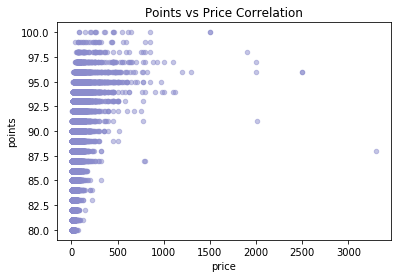

In [8]:
# Plot correlation variables points and price 

figure1 = df_filtered.plot.scatter(x='price', y='points',c='#8B8CCC', 
                                   alpha=0.5,title='Points vs Price Correlation')

plt.show()

#### Obs.:

       The interval of price is from 4 to 3300, meanwhile points's interval is from 80 to 100.
       Because of that, is necessary normalize the dataset. 

In [9]:
# Normalize DataFrame by Zscore

from scipy.stats import zscore
df_norm = df_filtered[['price', 'points']].apply(zscore)

# View some basic statistical details after normalization by zscore

df_norm.describe()

,price,points
count,1.115370e+05,1.115370e+05
mean,-2.662855e-17,-1.461640e-15
std,1.000004e+00,1.000004e+00
min,-7.509883e-01,-2.714807e+00
25%,-4.422941e-01,-7.788417e-01
50%,-2.523285e-01,-1.335199e-01
75%,1.513486e-01,8.344627e-01
max,7.751487e+01,3.738410e+00


In [10]:
# Correlation coefficient before e after zscore 

corr_before_zscore = np.corrcoef(df_filtered['points'],df_filtered['price'])

corr_after_zscore = np.corrcoef(df_norm['points'], df_norm['price'])

print('Correlation coefficient Before Zscore: %.3f \nCorrelation coefficient After Zscore: %.3f' % (corr_before_zscore[0][1], corr_after_zscore[0][1]))

Correlation coefficient Before Zscore: 0.417 
Correlation coefficient After Zscore: 0.417


### Obs.:
        Even after normalize the variables price and points by zscore the correlation coefficiente
        between its was equal. 

In [11]:
# Create a column log_price from price column
 
df_filtered['log_price'] = np.log(df_filtered['price'])

# Visualize our DataFrame

print(df_filtered.isnull().sum())

country        0
description    0
points         0
price          0
variety        0
winery         0
vintage        0
log_price      0
dtype: int64


In [12]:
# Visualize column log_price in DataFrame 

df_filtered.head()

,country,description,points,price,variety,winery,vintage,log_price
0,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos,2011,2.708050
1,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm,2013,2.639057
2,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian,2013,2.564949
3,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks,2012,4.174387
4,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tempranillo-Merlot,Tandem,2011,2.708050


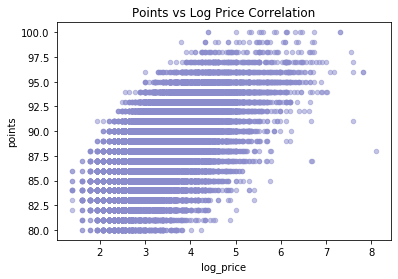

In [13]:
# Plot correlation variables points and log of price 

corr_graf2 = df_filtered.plot.scatter(x='log_price', y='points',c='#8B8CCC', 
                                      alpha=0.5, title='Points vs Log Price Correlation')

plt.show()

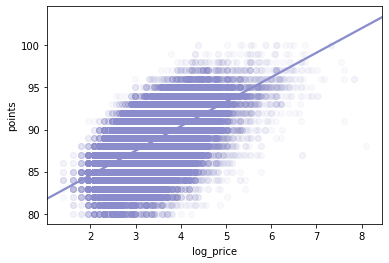

In [16]:
# Make a linear regression: 95% confidence interval (ci)

sns.regplot(x='log_price', y='points', data=df_filtered, 
            scatter_kws={'alpha':0.05}, ci=95, color='#8B8CCC',)

plt.show()


In [17]:
# Making some Word Clouds from variables price and points transformed in quartiles 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [62]:
# Separating the PRICE quartiles

price_quart1 = df_filtered[df_filtered.price < df_filtered.price.quantile(.25)].reset_index(drop=True)
price_quart1 = price_quart1.dropna().reset_index(drop=True)

price_quart2 = df_filtered[(df_filtered.price < df_filtered.price.quantile(.50)) & (df_filtered.price >= df_filtered.price.quantile(.25))].reset_index(drop=True)
price_quart2 = price_quart2.dropna().reset_index(drop=True)

price_quart3 = df_filtered[(df_filtered.price < df_filtered.price.quantile(.75)) & (df_filtered.price >= df_filtered.price.quantile(.50))].reset_index(drop=True)
price_quart3 = price_quart3.dropna().reset_index(drop=True)

price_quart4 = df_filtered[df_filtered.price >= df_filtered.price.quantile(.75)].reset_index(drop=True)
price_quart4 = price_quart4.dropna().reset_index(drop=True)

In [63]:
# df_filtered descriptions by PRICE

qt1_txt = str(price_quart1.description)
qt2_txt = str(price_quart2.description)
qt3_txt = str(price_quart3.description)
qt4_txt = str(price_quart4.description)

stopwords = set(STOPWORDS)

# Remove words that are common among the descriptions, in order to see if there is one characteristic
# that differentiates the quartiles

stopwords.update(["wine", "drink", "now", "flavor", "flavors", "aroma", "aromas",
                  "blend", "note", "notes", "made", "big", "find", "seems", "combine",
                 "yet", "color", "one", "touch", "put", "make", "show", "shows", "th",
                  "much", "well"])

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'Quartil 1 by price (The lowest)')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Quartil 2 by price')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Quartil 3 by price')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Quartil 4 by price (The highest)')

(-0.5, 399.5, 199.5, -0.5)

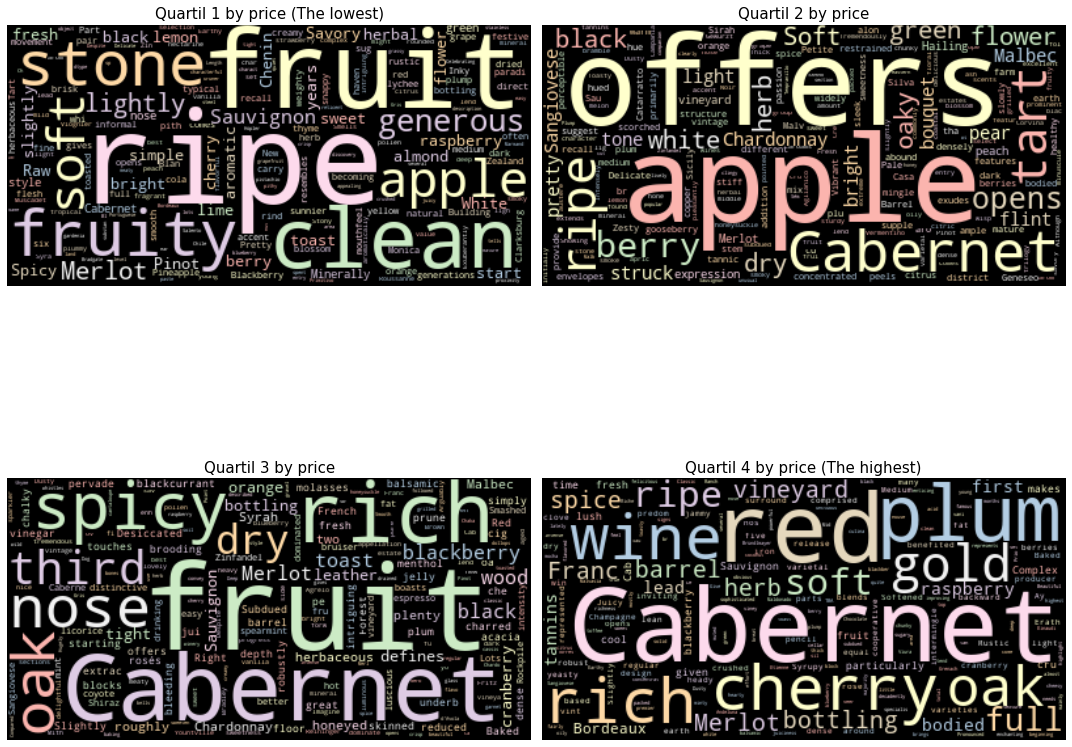

In [64]:
# Figures WordCloud by PRICE 

plt.figure(figsize=(15,15))

# Plot 1

plt.subplot(2, 2, 1)
plt.title('Quartil 1 by price (The lowest)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='Pastel1').generate(qt1_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 2

plt.subplot(2, 2, 2)
plt.title('Quartil 2 by price', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='Pastel1').generate(qt2_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 3

plt.subplot(2, 2, 3)
plt.title('Quartil 3 by price', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='Pastel1').generate(qt3_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 4

plt.subplot(2, 2, 4)
plt.title('Quartil 4 by price (The highest)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap="Pastel1").generate(qt4_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()


In [65]:
# Separating the POINT quartiles

point_quart1 = df_filtered[df_filtered.points < df_filtered.points.quantile(.25)].reset_index(drop=True)
point_quart1 = point_quart1.dropna().reset_index(drop=True)

point_quart2 = df_filtered[(df_filtered.points < df_filtered.points.quantile(.50)) & (df_filtered.points >= df_filtered.points.quantile(.25))].reset_index(drop=True)
point_quart2 = point_quart2.dropna().reset_index(drop=True)

point_quart3 = df_filtered[(df_filtered.points < df_filtered.points.quantile(.75)) & (df_filtered.points >= df_filtered.points.quantile(.50))].reset_index(drop=True)
point_quart3 = point_quart3.dropna().reset_index(drop=True)

point_quart4 = df_filtered[df_filtered.points >= df_filtered.points.quantile(.75)].reset_index(drop=True)
point_quart4 = point_quart4.dropna().reset_index(drop=True)



In [66]:
# df_filtered descriptions by POINTS

q1_txt = str(point_quart1.description)
q2_txt = str(point_quart2.description)
q3_txt = str(point_quart3.description)
q4_txt = str(point_quart4.description)

stopwords = set(STOPWORDS)

# Remove words that are common among the descriptions, in order to see if there is one characteristic
# that differentiates the quartiles

stopwords.update(["wine", "drink", "now", "flavor", "flavors", "aroma", "aromas",
                  "blend", "note", "notes", "made", "big", "find", "seems", "combine",
                 "yet", "color", "one", "touch", "put", "make", "show", "shows", "th",
                 "much", "well"])

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'Quartil 1 by points (The lowest-scoring)')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Quartil 2 by points')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Quartil 3 by points')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Quartil 4 by points (The highest)')

(-0.5, 399.5, 199.5, -0.5)

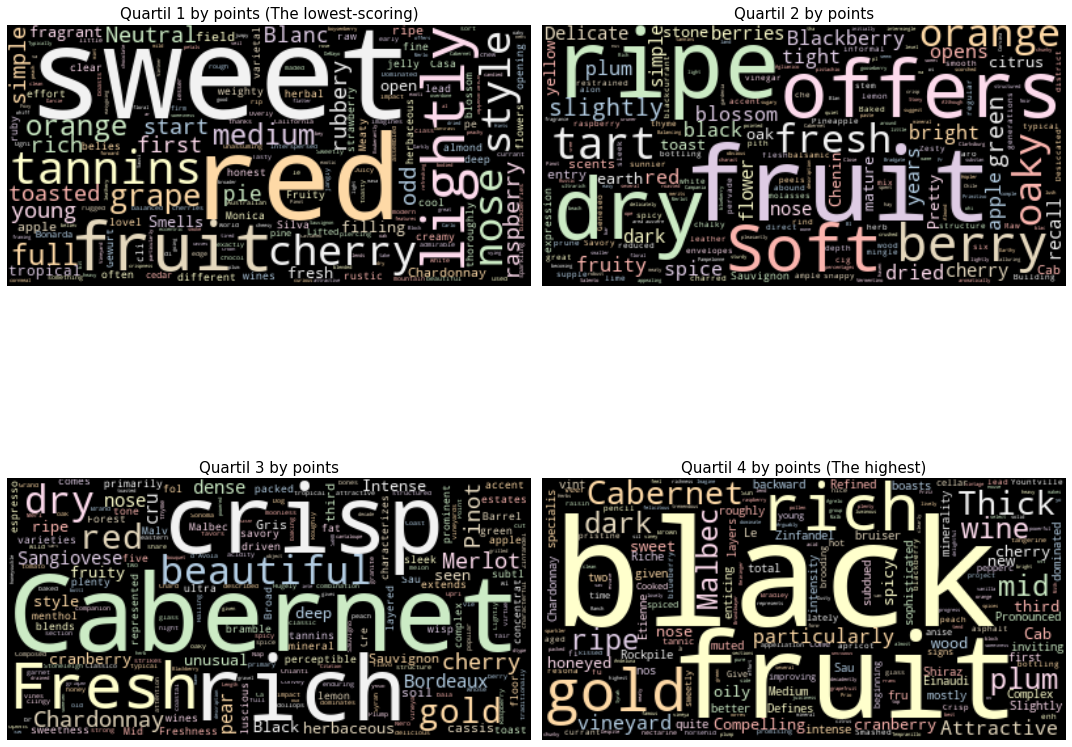

In [67]:
# Figures WordCloud by POINTS 

plt.figure(figsize=(15,15))

# Plot 1
plt.subplot(2, 2, 1)
plt.title('Quartil 1 by points (The lowest-scoring)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='Pastel1').generate(q1_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 2

plt.subplot(2, 2, 2)
plt.title('Quartil 2 by points', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='Pastel1').generate(q2_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 3

plt.subplot(2, 2, 3)
plt.title('Quartil 3 by points', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='Pastel1').generate(q3_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Plot 4

plt.subplot(2, 2, 4)
plt.title('Quartil 4 by points (The highest)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='Pastel1').generate(q4_txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()
plt.show()


## Conclusions:

The variables price and points have a positive correlation and some terms are more frequent in wines with points and prices lower and ones other are more frequent in wines with higher points and prices. Therefore, based on this analysis we have the conclusion that wines more expensive has higher scores as well as cheaper wines has lower scores. 